## ZZ-X-Z Ising Model -> Dataset of $\mathbf{z}$ and $\braket{\hat{Z_i} \hat{Z_{i+1}}}$

Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Data

In [3]:
data=np.load('data/kohm_sham_approach/h_2.7_j_1_1nn_n_150000.npz')

z=data['density']
f=data['density_F']
x=data['transverse_magnetization']
h=data['potential']
e=data['energy']
zz=np.roll(z,shift=-1,axis=-1)*z




In [11]:
np.savez('data/kohm_sham_approach/dataset_2channels_h_2.7_j_1_1nn_n_150000',density_F=np.append(f.reshape(-1,1,8),x.reshape(-1,1,8),axis=1),density=z,transverse_magnetization=x,zz=f,energy=e,potential=h)

Check the Energy functional term

-1.34789956973691e-16


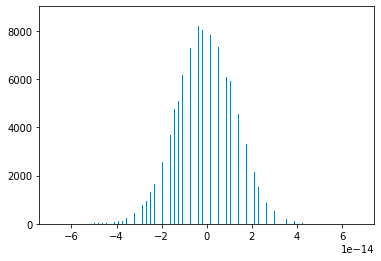

In [7]:
e_ext=h*z
e_composition=f+x+e_ext
e_composition=np.sum(e_composition,axis=-1)

print(np.average(e-e_composition,axis=0))
plt.hist(e-e_composition,bins=500)
plt.show()

Visualization

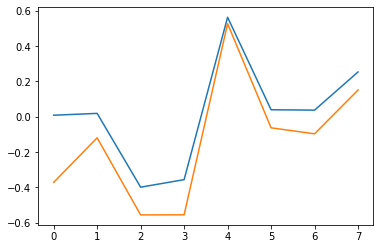

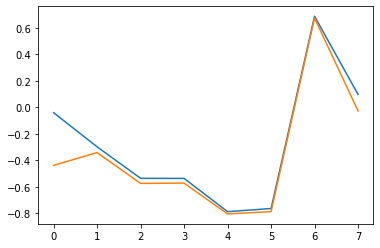

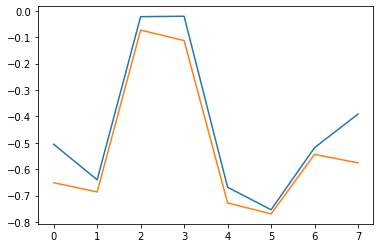

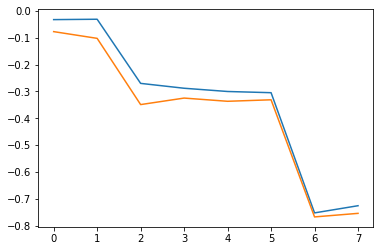

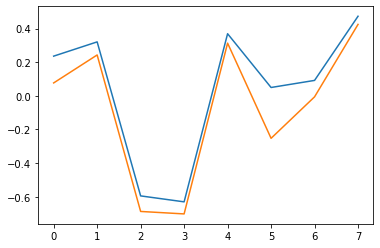

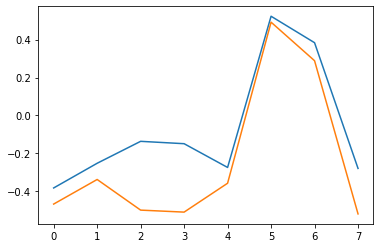

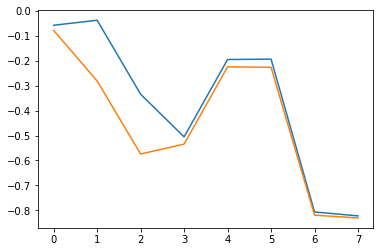

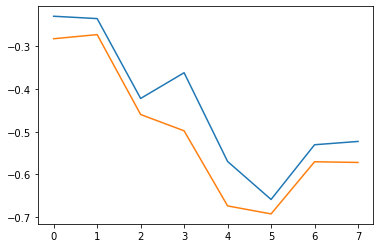

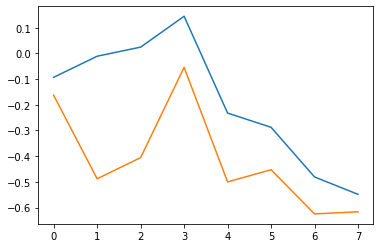

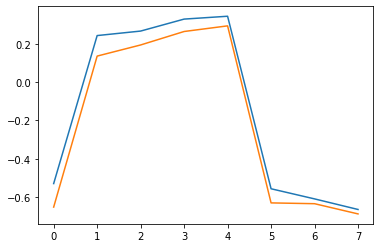

In [8]:
for i in range(10):
    plt.plot(zz[i],label=r'$z_{i}z_{i+1}$')
    plt.plot(f[i],label=r'$f_i[\mathbf{z}]$')
    plt.show()

Save the correction dataset

In [9]:
np.savez('data/kohm_sham_approach/reduction_f_h_2.7_j_1_1nn_n_150000.npz',zz=zz,density_F=f-zz, density=z)


